In [3]:
import os
import sys
import ast
import math
import swifter
import csv
import json
import numpy as np
import pandas as pd
import datetime as dt
import itertools as it
import portion as P
from collections import namedtuple
from pprint import pprint
from tqdm.notebook import tqdm

import matplotlib.pylab as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'  # 提高 jupyter notebook 的圖形顯示解析度
# plt.style.use('ggplot')

pdir = os.path.abspath(os.path.join(os.getcwd(), '.'))  # for jupyter-notebook
sys.path.insert(1, pdir)
from myutils import *

# pd.set_option('display.max_columns', 200)
# pd.set_option('display.max_rows', 200)

# Box Plot

Uplink DataFrame:
   Tr.  sm00  sm01  sm03
0  #01     1     2     5
1  #02     7     1     3
2  #03     5     9     1

Downlink DataFrame:
   Tr.  sm00  sm01  sm03
0  #01     6     6     3
1  #02     3     2     8
2  #03     1     1     3


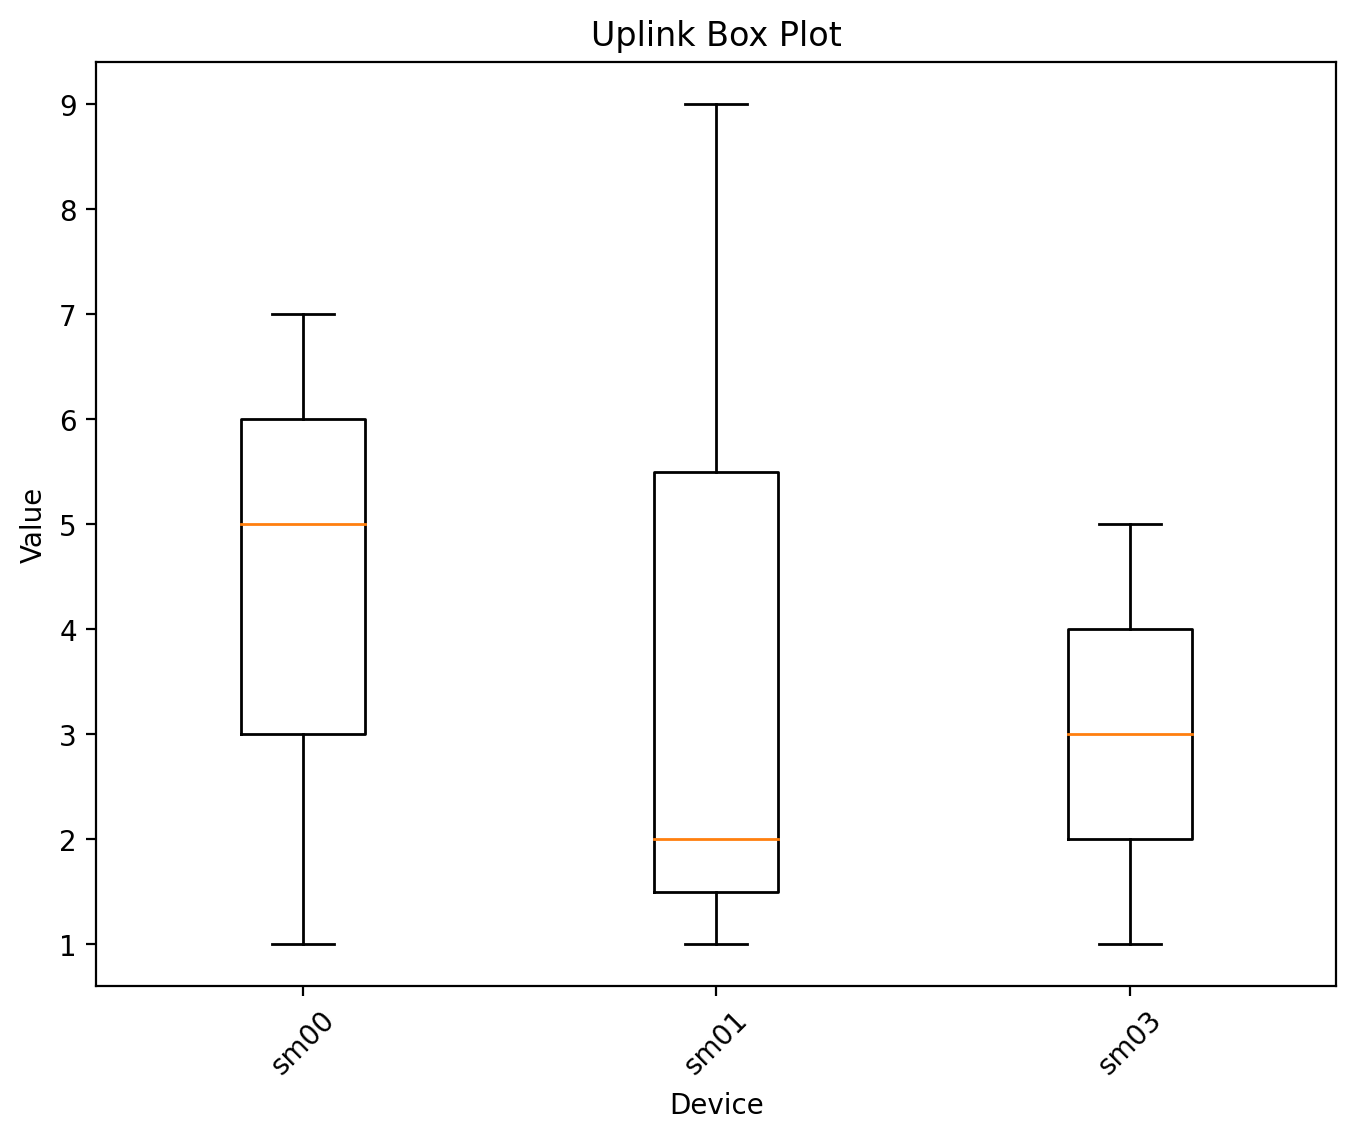

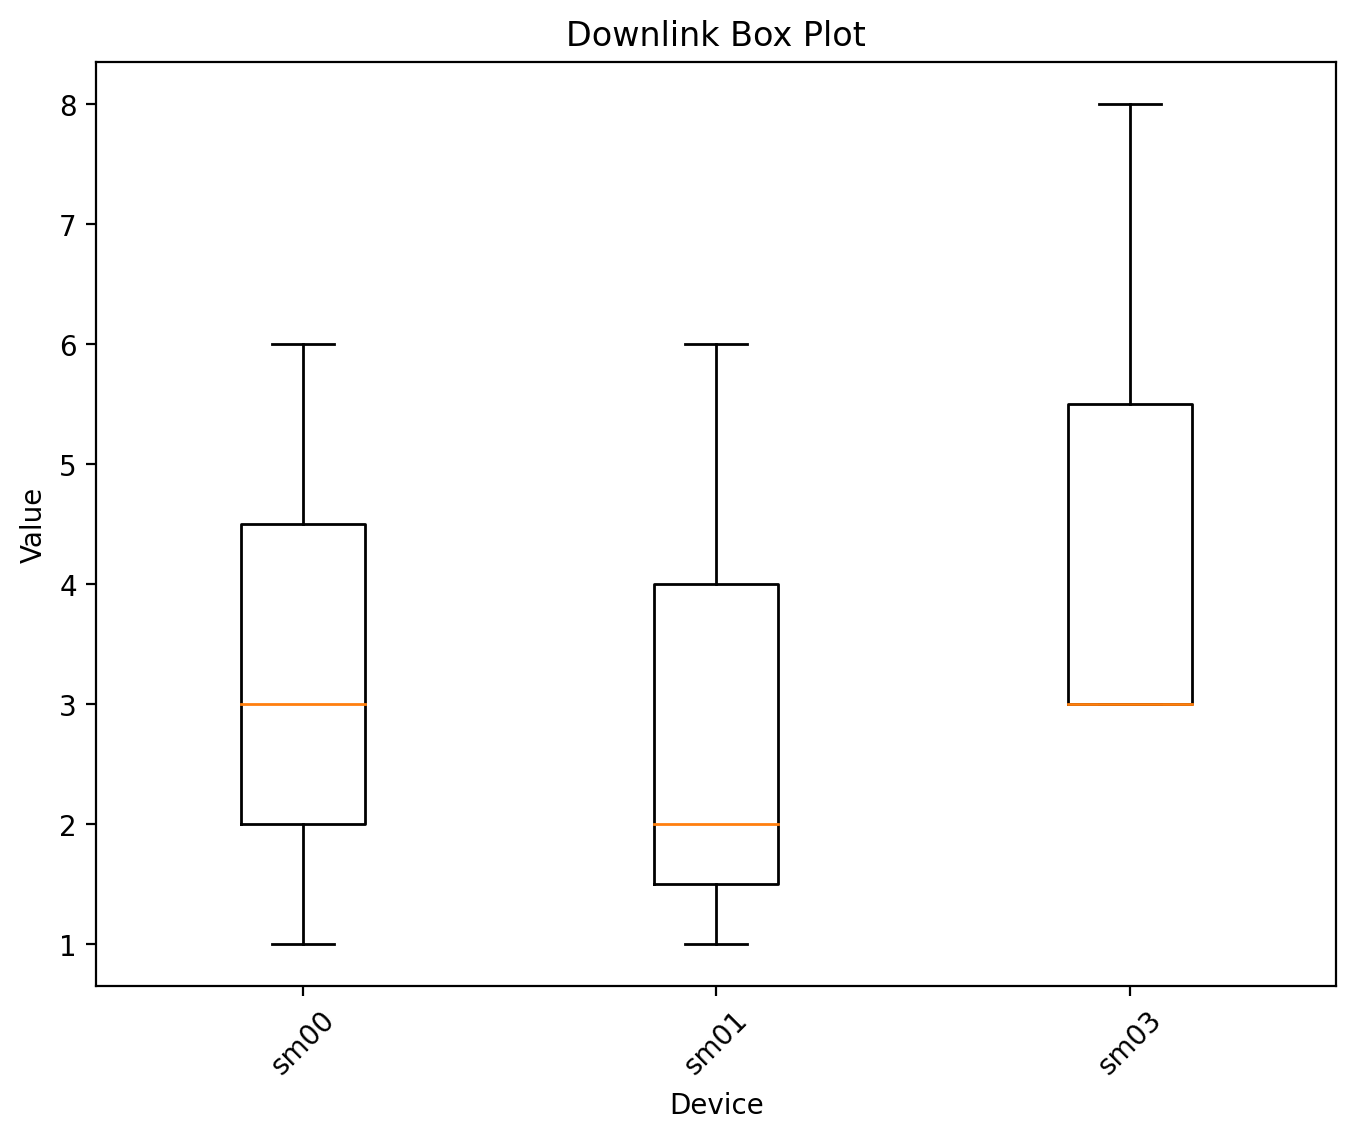

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# 给定数据
data = {
    'sm00': {
        'uplink': [1, 7, 5],
        'downlink': [6, 3, 1]
    },
    'sm01': {
        'uplink': [2, 1, 9],
        'downlink': [6, 2, 1]
    },
    'sm03': {
        'uplink': [5, 3, 1],
        'downlink': [3, 8, 3]
    }
}

# 建立DataFrame来记录数据
df_uplink = pd.DataFrame(data={k: v['uplink'] for k, v in data.items()}, index=['#01', '#02', '#03']).reset_index().rename(columns={'index':'Tr.'})
df_downlink = pd.DataFrame(data={k: v['downlink'] for k, v in data.items()}, index=['#01', '#02', '#03']).reset_index().rename(columns={'index':'Tr.'})

# 打印DataFrame
print("Uplink DataFrame:")
print(df_uplink)
print("\nDownlink DataFrame:")
print(df_downlink)

# 绘制box plot
# Extract 'uplink' and 'downlink' data
uplink_data = [v['uplink'] for v in data.values()]
downlink_data = [v['downlink'] for v in data.values()]

# Plot boxplots for 'uplink' and 'downlink'
plt.figure(figsize=(8, 6))
plt.boxplot(uplink_data, labels=data.keys())
plt.title("Uplink Box Plot")
plt.ylabel("Value")
plt.xlabel("Device")
plt.xticks(rotation=45)

plt.figure(figsize=(8, 6))
plt.boxplot(downlink_data, labels=data.keys())
plt.title("Downlink Box Plot")
plt.ylabel("Value")
plt.xlabel("Device")
plt.xticks(rotation=45)

plt.show()

Uplink DataFrame:
   Tr.  sm00  sm01  sm03
0  #01     1     2     5
1  #02     7     1     3
2  #03     5     9     1

Downlink DataFrame:
   Tr.  sm00  sm01  sm03
0  #01     6     6     3
1  #02     3     2     8
2  #03     1     1     3


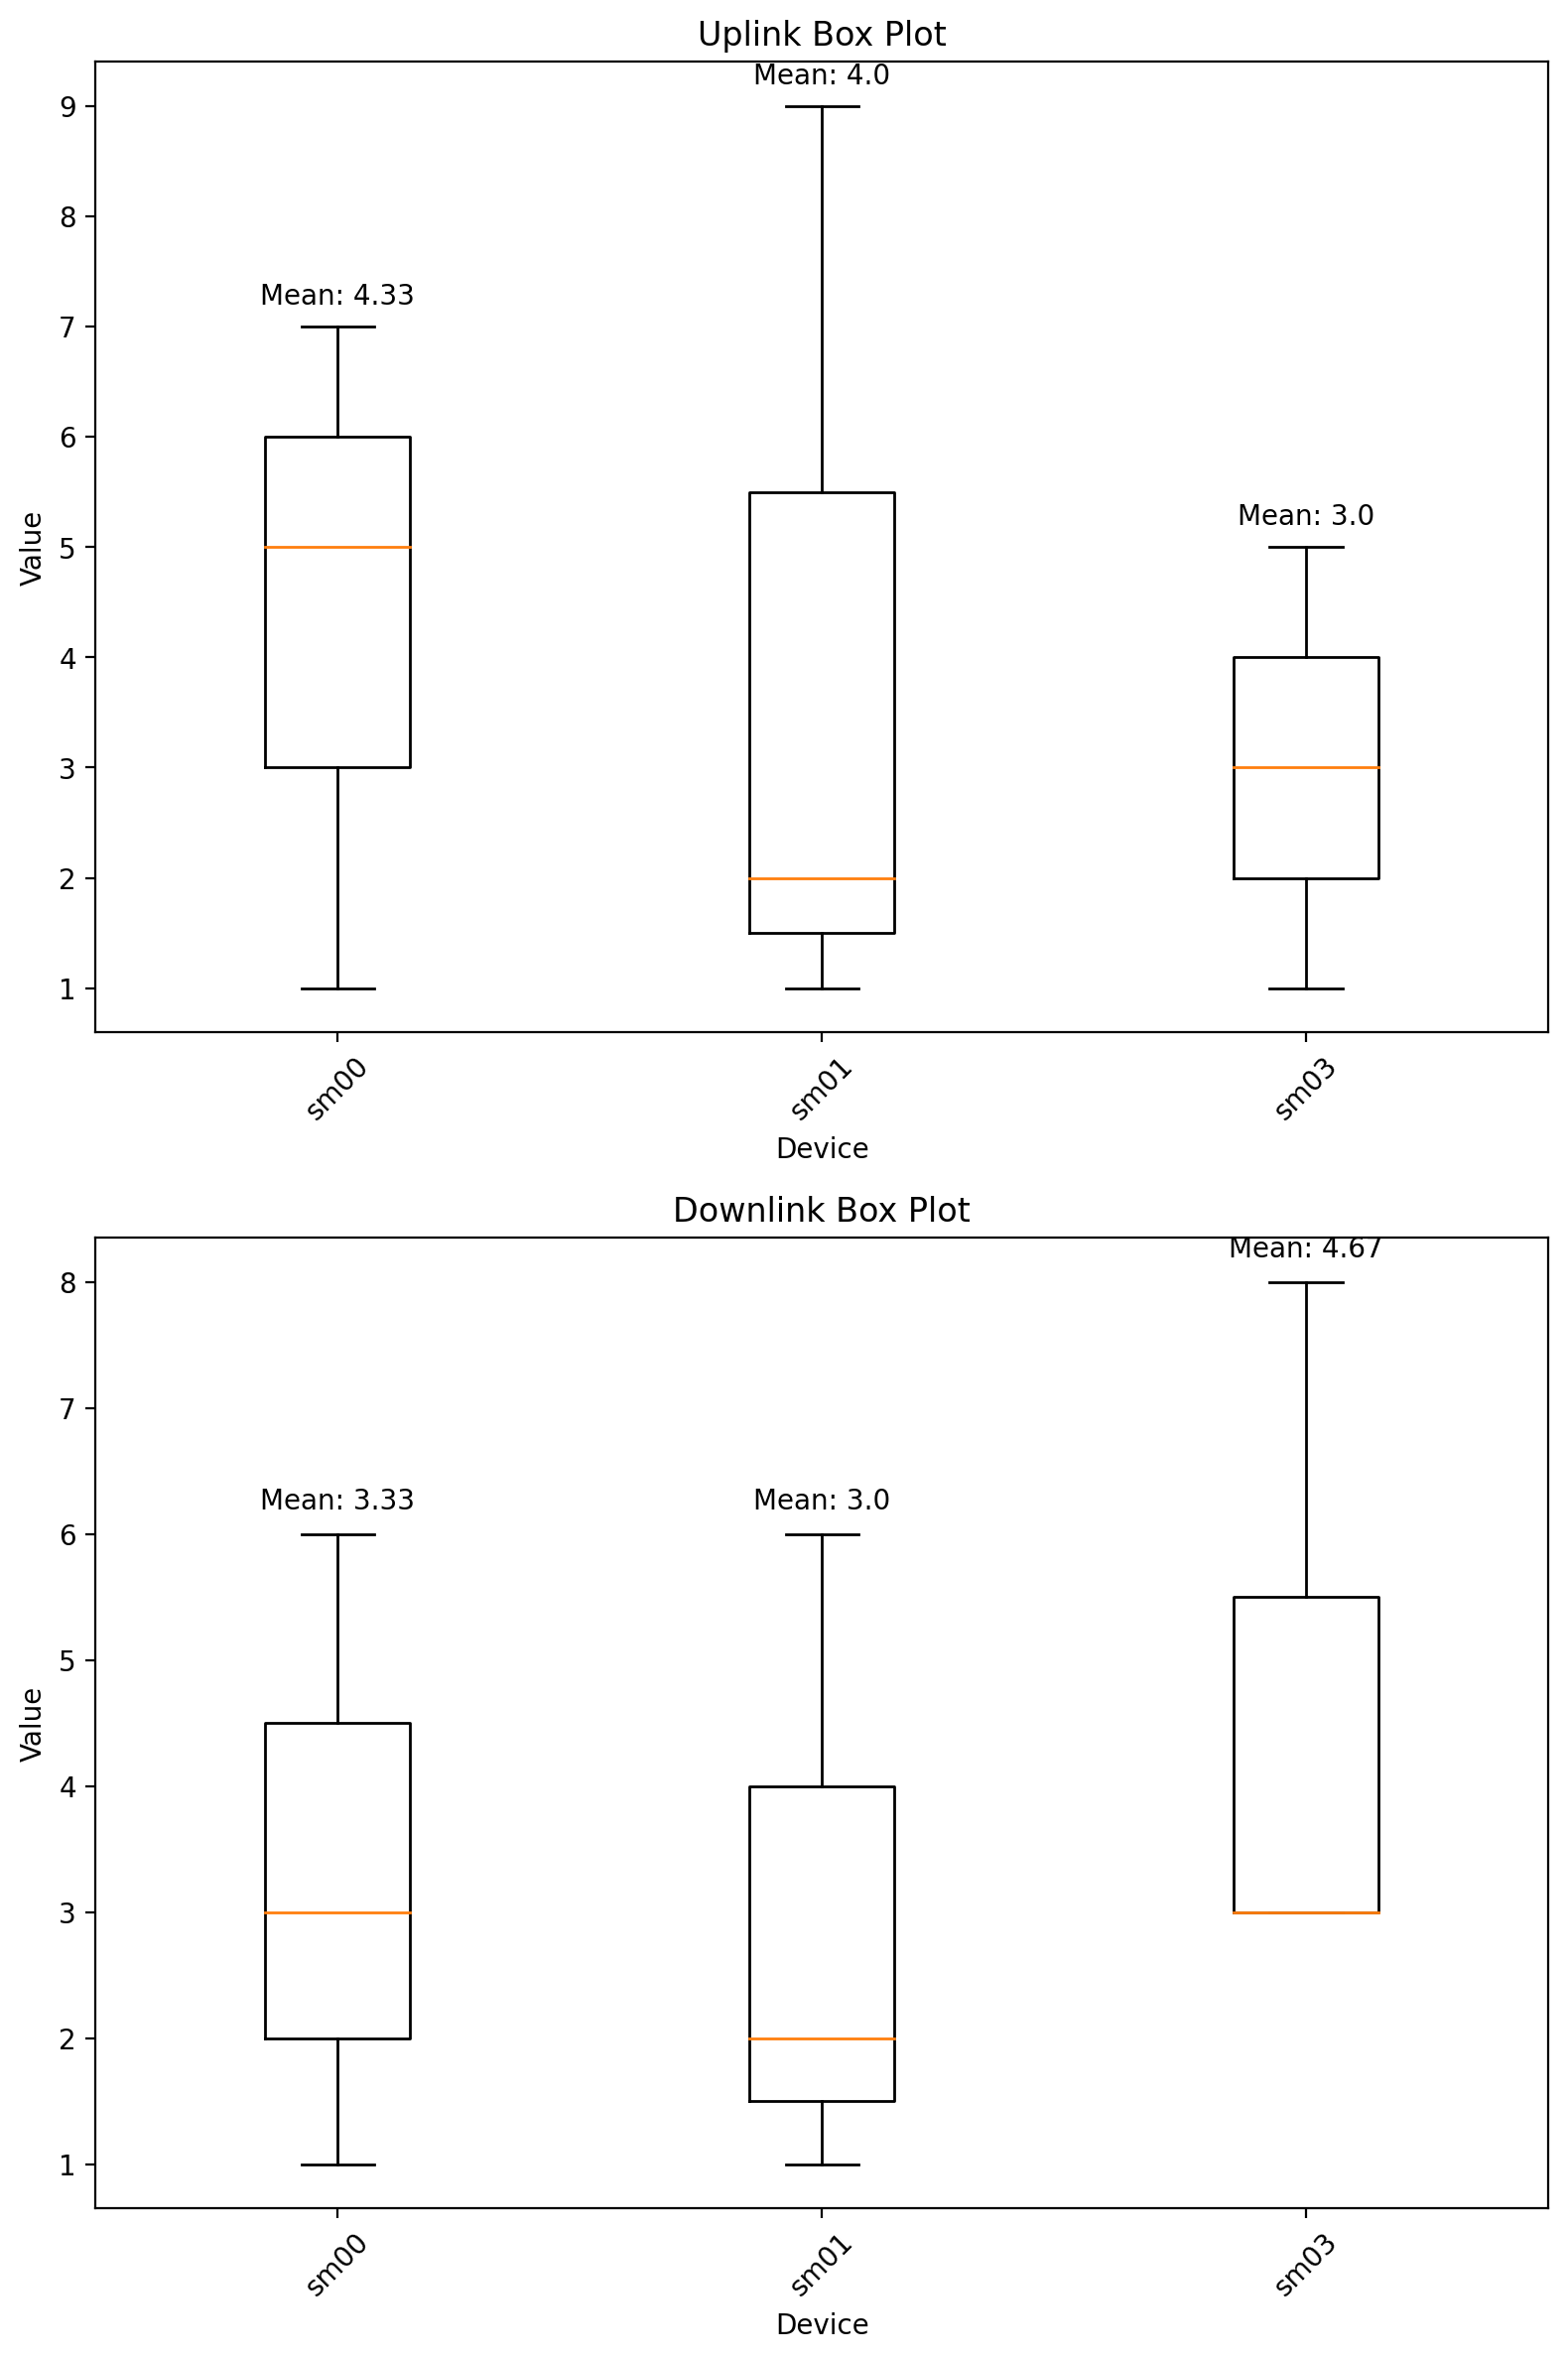

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# 给定数据
data = {
    'sm00': {
        'uplink': [1, 7, 5],
        'downlink': [6, 3, 1]
    },
    'sm01': {
        'uplink': [2, 1, 9],
        'downlink': [6, 2, 1]
    },
    'sm03': {
        'uplink': [5, 3, 1],
        'downlink': [3, 8, 3]
    }
}

# 建立DataFrame来记录数据
df_uplink = pd.DataFrame(data={k: v['uplink'] for k, v in data.items()}, index=['#01', '#02', '#03']).reset_index().rename(columns={'index':'Tr.'})
df_downlink = pd.DataFrame(data={k: v['downlink'] for k, v in data.items()}, index=['#01', '#02', '#03']).reset_index().rename(columns={'index':'Tr.'})

# 打印DataFrame
print("Uplink DataFrame:")
print(df_uplink)
print("\nDownlink DataFrame:")
print(df_downlink)

# 绘制box plot
# Extract 'uplink' and 'downlink' data
uplink_data = [v['uplink'] for v in data.values()]
downlink_data = [v['downlink'] for v in data.values()]

# Plot boxplots for 'uplink' and 'downlink'
fig, axes = plt.subplots(2, 1, figsize=(8, 12))

# Uplink box plot
# bp_uplink = axes[0].boxplot(uplink_data, labels=data.keys(), patch_artist=True)
bp_uplink = axes[0].boxplot(uplink_data, labels=data.keys())
axes[0].set_title("Uplink Box Plot")
axes[0].set_ylabel("Value")
axes[0].set_xlabel("Device")
axes[0].tick_params(axis='x', rotation=45)

# Downlink box plot
# bp_downlink = axes[1].boxplot(downlink_data, labels=data.keys(), patch_artist=True)
bp_downlink = axes[1].boxplot(downlink_data, labels=data.keys())
axes[1].set_title("Downlink Box Plot")
axes[1].set_ylabel("Value")
axes[1].set_xlabel("Device")
axes[1].tick_params(axis='x', rotation=45)

# 使用文本标注平均值
for i, box_data in enumerate(uplink_data):
    mean_value = round(np.mean(box_data), 2)
    axes[0].text(i + 1, max(box_data) + 0.2, f'Mean: {mean_value}', ha='center', fontsize=10)

for i, box_data in enumerate(downlink_data):
    mean_value = round(np.mean(box_data), 2)
    axes[1].text(i + 1, max(box_data) + 0.2, f'Mean: {mean_value}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


# Bar Chart

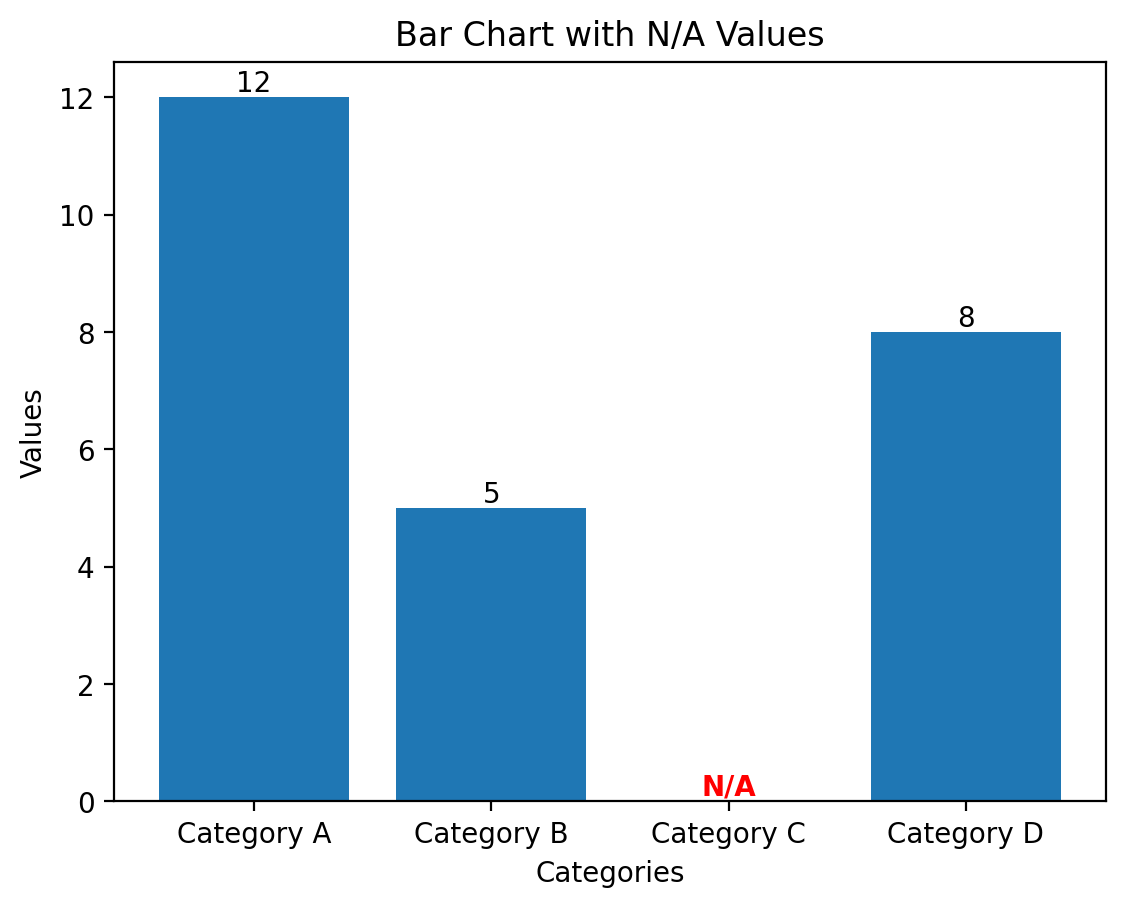

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data including N/A values
categories = ['Category A', 'Category B', 'Category C', 'Category D']
values = [12, 5, np.nan, 8]

# Create a figure and axis
fig, ax = plt.subplots()

# Create a bar chart using ax.bar()
ax.bar(categories, values)

# Add labels for non-missing values
for i, v in enumerate(values):
    if not np.isnan(v):
        ax.text(i, v, str(v), ha='center', va='bottom')

# Add "N/A" label for missing values
for i, v in enumerate(values):
    if np.isnan(v):
        ax.text(i, 0, "N/A", ha='center', va='bottom', color='red', fontweight='bold')

# Set labels and title
ax.set_xlabel('Categories')
ax.set_ylabel('Values')
ax.set_title('Bar Chart with N/A Values')

# Show the plot
plt.show()

# Heatmap

/var/folders/vy/w6g3hxgj76s0gzty27t2d6gm0000gn/T/ipykernel_22521/162046795.py:40: UserWarning: Glyph 19979 (\N{CJK UNIFIED IDEOGRAPH-4E0B}) missing from current font.
  plt.tight_layout()
/var/folders/vy/w6g3hxgj76s0gzty27t2d6gm0000gn/T/ipykernel_22521/162046795.py:40: UserWarning: Glyph 19977 (\N{CJK UNIFIED IDEOGRAPH-4E09}) missing from current font.
  plt.tight_layout()
/var/folders/vy/w6g3hxgj76s0gzty27t2d6gm0000gn/T/ipykernel_22521/162046795.py:40: UserWarning: Glyph 35282 (\N{CJK UNIFIED IDEOGRAPH-89D2}) missing from current font.
  plt.tight_layout()
/var/folders/vy/w6g3hxgj76s0gzty27t2d6gm0000gn/T/ipykernel_22521/162046795.py:40: UserWarning: Glyph 28909 (\N{CJK UNIFIED IDEOGRAPH-70ED}) missing from current font.
  plt.tight_layout()
/var/folders/vy/w6g3hxgj76s0gzty27t2d6gm0000gn/T/ipykernel_22521/162046795.py:40: UserWarning: Glyph 21147 (\N{CJK UNIFIED IDEOGRAPH-529B}) missing from current font.
  plt.tight_layout()
/var/folders/vy/w6g3hxgj76s0gzty27t2d6gm0000gn/T/ipykernel_2

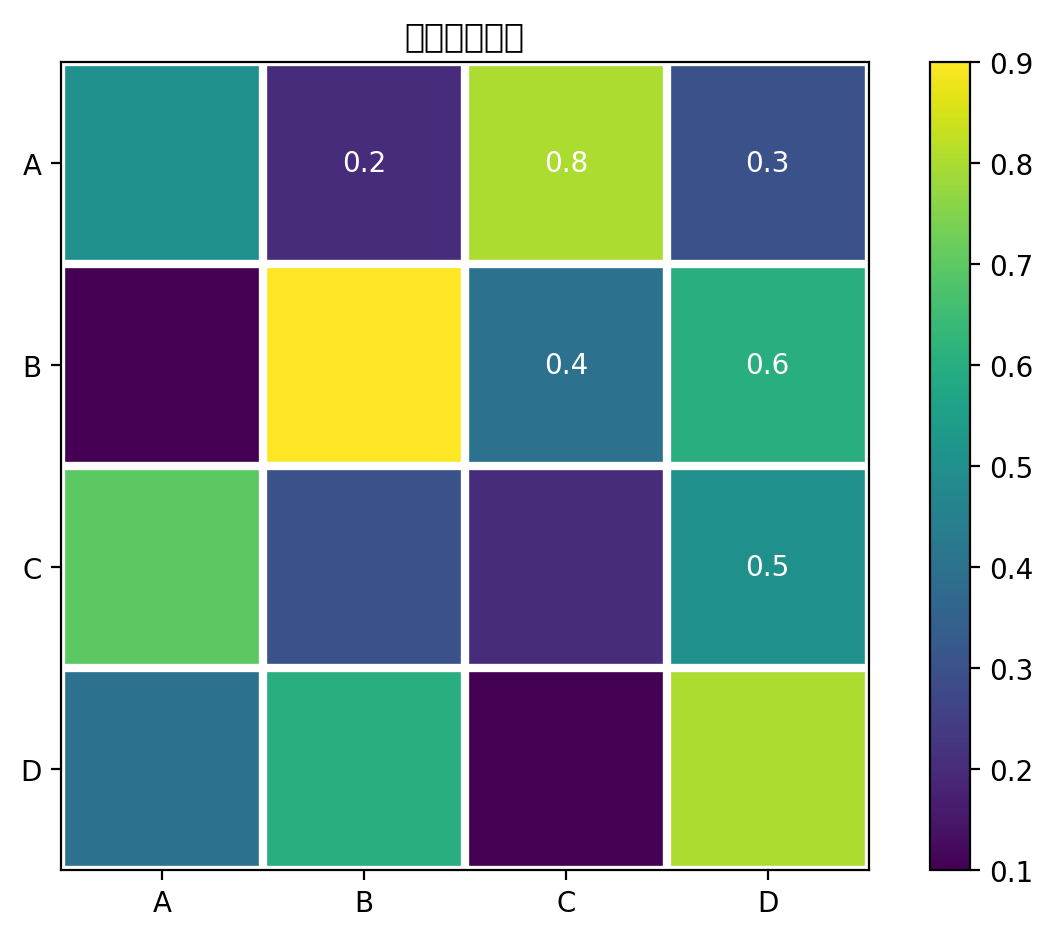

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 示例数据
data = np.array([[0.5, 0.2, 0.8, 0.3],
                 [0.1, 0.9, 0.4, 0.6],
                 [0.7, 0.3, 0.2, 0.5],
                 [0.4, 0.6, 0.1, 0.8]])

# 创建figure和axes
fig, ax = plt.subplots()

# 绘制下三角热力图
im = ax.imshow(data, cmap='viridis')

# 添加颜色条
cbar = ax.figure.colorbar(im, ax=ax)

# 设置x轴和y轴标签
ax.set_xticks(np.arange(data.shape[1]))
ax.set_yticks(np.arange(data.shape[0]))
ax.set_xticklabels(['A', 'B', 'C', 'D'])
ax.set_yticklabels(['A', 'B', 'C', 'D'])

# 在格子中显示数值
for i in range(data.shape[0]):
    for j in range(i + 1, data.shape[1]):
        text = ax.text(j, i, '{:.1f}'.format(data[i, j]), ha='center', va='center', color='w')

# 隐藏上三角
ax.set_xticks(np.arange(data.shape[1] + 1) - .5, minor=True)
ax.set_yticks(np.arange(data.shape[0] + 1) - .5, minor=True)
ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
ax.tick_params(which="minor", size=0)

# 设置标题
ax.set_title("下三角热力图")

# 调整图形布局，避免切断标题或颜色条
plt.tight_layout()

# 显示图形
plt.show()


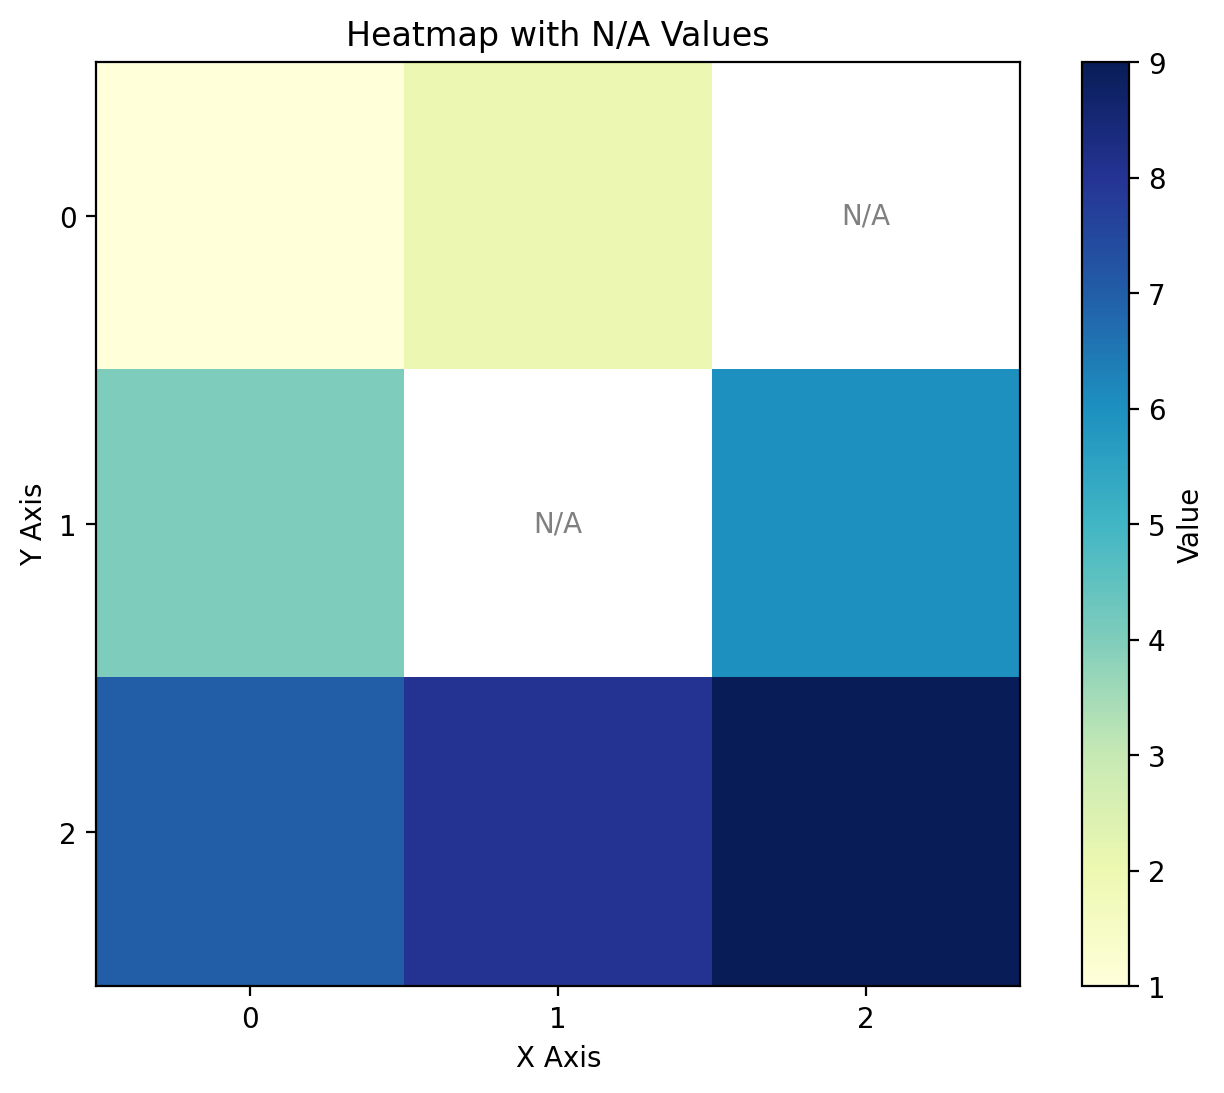

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 示例数据，包含NaN值
data = np.array([[1, 2, np.nan],
                 [4, np.nan, 6],
                 [7, 8, 9]])

# 绘制热力图
plt.figure(figsize=(8, 6))
plt.imshow(data, cmap='YlGnBu', interpolation='nearest')

# 在相应位置上标注"N/A"
rows, cols = data.shape
for i in range(rows):
    for j in range(cols):
        if np.isnan(data[i, j]):
            plt.text(j, i, "N/A", ha='center', va='center', color='gray')

plt.colorbar(label='Value')
plt.title("Heatmap with N/A Values")
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.xticks(np.arange(cols))
plt.yticks(np.arange(rows))
plt.show()


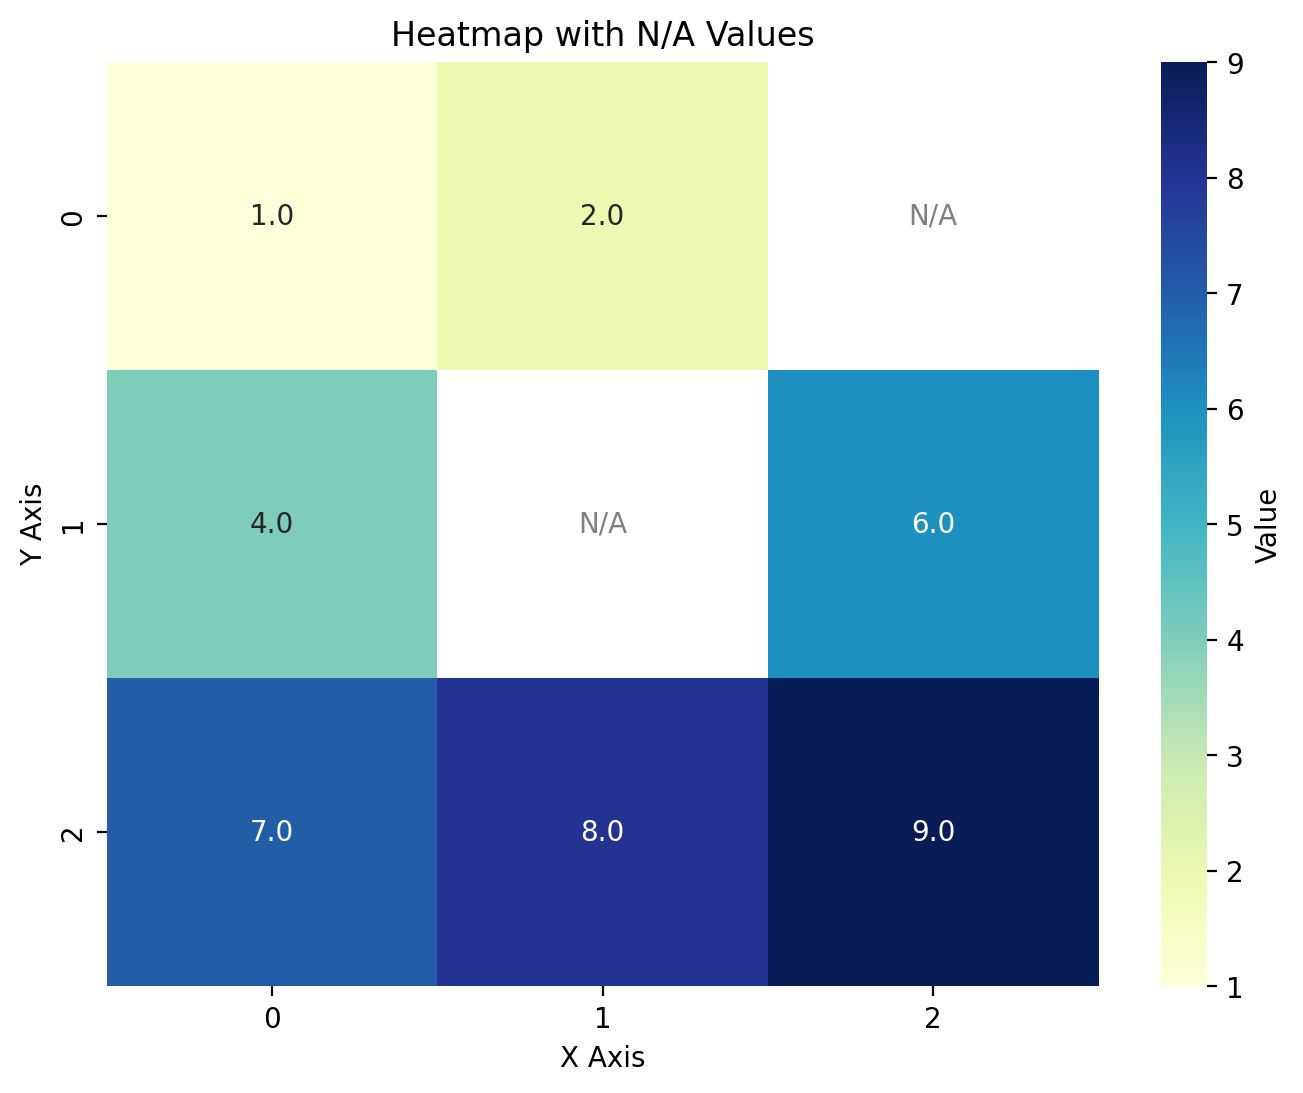

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 示例数据，包含NaN值
data = np.array([[1, 2, np.nan],
                 [4, np.nan, 6],
                 [7, 8, 9]])

# 创建一个Mask，将NaN值设为True
mask = np.isnan(data)

# 绘制热力图，并使用mask参数来处理NaN值
plt.figure(figsize=(8, 6))
sns.heatmap(data, annot=True, fmt=".1f", cmap="YlGnBu", mask=mask, cbar_kws={'label': 'Value'})

# 在相应位置上添加"N/A"标注
rows, cols = data.shape
for i in range(rows):
    for j in range(cols):
        if mask[i, j]:
            plt.text(j + 0.5, i + 0.5, "N/A", ha='center', va='center', color='gray')

plt.title("Heatmap with N/A Values")
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
plt.show()
